In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import csv

# Part 1: Crime data Process

## Import the original crime data

Since the dataset is too large, they are imported as two seperate file and then be merged together

In [102]:
# Crime data from 01/2015 to 12/2017
crime_15_17 = pd.read_csv(r'Crimes2015_17.csv')

In [103]:
crime_15_17

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10225520,HY412735,01/01/2015 12:00:00 AM,075XX S BLACKSTONE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,5.0,43,11,1187511.0,1855334.0,2015,02/10/2018 03:50:01 PM,41.758131,-87.588352,"(41.758131167, -87.588352326)"
1,11028448,JA360336,01/01/2015 12:00:00 AM,051XX W HURON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,True,...,37.0,25,02,NaN,NaN,2015,09/02/2019 03:57:18 PM,NaN,NaN,NaN
2,10225760,HY412902,01/01/2015 12:00:00 AM,050XX N MARINE DR,0810,THEFT,OVER $500,APARTMENT,False,False,...,48.0,3,06,1169650.0,1934124.0,2015,02/10/2018 03:50:01 PM,41.974743,-87.651517,"(41.974742888, -87.651517395)"
3,11242929,JB168310,01/01/2015 12:00:00 AM,049XX S COTTAGE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,4.0,39,11,NaN,NaN,2015,03/01/2018 03:54:55 PM,NaN,NaN,NaN
4,10229179,HY416572,01/01/2015 12:00:00 AM,039XX S LAKE PARK AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,4.0,36,20,1183388.0,1878984.0,2015,02/10/2018 03:50:01 PM,41.823126,-87.602726,"(41.823125769, -87.602725951)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803280,11192239,JB100032,12/31/2017 11:45:00 PM,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,05/04/2018 03:51:04 PM,41.856427,-87.638893,"(41.856426716, -87.638892854)"
803281,11192254,JB100003,12/31/2017 11:45:00 PM,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,05/04/2018 03:51:04 PM,41.683369,-87.622830,"(41.683369303, -87.622829524)"
803282,11192540,JB100551,12/31/2017 11:48:00 PM,001XX E SUPERIOR ST,0890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,06,1177508.0,1905401.0,2017,05/04/2018 03:51:04 PM,41.895751,-87.623496,"(41.895750913, -87.623495923)"
803283,11196379,JB105867,12/31/2017 11:50:00 PM,024XX N LAKE SHORE DR NB,0460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,05/04/2018 03:51:04 PM,41.926559,-87.631294,"(41.926558908, -87.631294073)"


In [104]:
# Crime data from 01/2018 to 04/2022
crime_18_22 = pd.read_excel(r'Crimes_2018_2022.4.xlsx')

In [105]:
crime_18_22

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12137388,JD334537,01/01/2018 12:00:00 AM,010XX W NEWPORT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,...,44.0,6.0,11,NaN,NaN,2018,08/17/2020 03:50:01 PM,NaN,NaN,NaN
1,11196173,JB105519,01/01/2018 12:00:00 AM,075XX S ST LOUIS AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,18.0,70.0,11,1154348.0,1854412.0,2018,05/04/2018 03:51:04 PM,41.756325,-87.709916,"(41.756324845, -87.709916401)"
2,11198738,JB108247,01/01/2018 12:00:00 AM,0000X S COLUMBUS DR,820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,42.0,32.0,6,1178293.0,1900315.0,2018,05/04/2018 03:51:04 PM,41.881777,-87.620768,"(41.881776822, -87.620767948)"
3,11212228,JB127156,01/01/2018 12:00:00 AM,109XX S HALSTED ST,810,THEFT,OVER $500,NURSING HOME/RETIREMENT HOME,False,False,...,34.0,49.0,6,1172930.0,1832289.0,2018,05/04/2018 03:51:04 PM,41.695227,-87.642468,"(41.69522655, -87.642467755)"
4,11220328,JB137687,01/01/2018 12:00:00 AM,038XX N DRAKE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,True,True,...,35.0,16.0,20,1152042.0,1925257.0,2018,05/04/2018 03:51:04 PM,41.950778,-87.716502,"(41.950777548, -87.716502434)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000015,12665837,JF202108,04/08/2022 11:38:00 PM,033XX W 54TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,...,14.0,63.0,14,1154847.0,1868611.0,2022,04/15/2022 04:49:50 PM,41.795279,-87.707709,"(41.795279122, -87.707709087)"
1000016,26697,JF202059,04/08/2022 11:39:00 PM,020XX W 35TH ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,12.0,59.0,01A,1163176.0,1881462.0,2022,04/15/2022 04:49:50 PM,41.830373,-87.676806,"(41.830373381, -87.676806309)"
1000017,12665852,JF202129,04/08/2022 11:40:00 PM,044XX N CLARENDON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,46.0,3.0,08B,1170120.0,1929591.0,2022,04/15/2022 04:49:50 PM,41.962294,-87.649922,"(41.962293932, -87.649922035)"
1000018,12665907,JF202148,04/08/2022 11:52:00 PM,059XX S RACINE AVE,5111,OTHER OFFENSE,GUN OFFENDER - ANNUAL REGISTRATION,STREET,True,False,...,16.0,67.0,26,1169337.0,1865408.0,2022,04/15/2022 04:49:50 PM,41.786188,-87.654667,"(41.786188054, -87.654666603)"


In [106]:
# Merge the two data frame
crime_df = crime_15_17.append(crime_18_22, ignore_index=True)

In [107]:
crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10225520,HY412735,01/01/2015 12:00:00 AM,075XX S BLACKSTONE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,5.0,43.0,11,1187511.0,1855334.0,2015,02/10/2018 03:50:01 PM,41.758131,-87.588352,"(41.758131167, -87.588352326)"
1,11028448,JA360336,01/01/2015 12:00:00 AM,051XX W HURON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,True,...,37.0,25.0,02,NaN,NaN,2015,09/02/2019 03:57:18 PM,NaN,NaN,NaN
2,10225760,HY412902,01/01/2015 12:00:00 AM,050XX N MARINE DR,0810,THEFT,OVER $500,APARTMENT,False,False,...,48.0,3.0,06,1169650.0,1934124.0,2015,02/10/2018 03:50:01 PM,41.974743,-87.651517,"(41.974742888, -87.651517395)"
3,11242929,JB168310,01/01/2015 12:00:00 AM,049XX S COTTAGE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,4.0,39.0,11,NaN,NaN,2015,03/01/2018 03:54:55 PM,NaN,NaN,NaN
4,10229179,HY416572,01/01/2015 12:00:00 AM,039XX S LAKE PARK AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,4.0,36.0,20,1183388.0,1878984.0,2015,02/10/2018 03:50:01 PM,41.823126,-87.602726,"(41.823125769, -87.602725951)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803300,12665837,JF202108,04/08/2022 11:38:00 PM,033XX W 54TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,...,14.0,63.0,14,1154847.0,1868611.0,2022,04/15/2022 04:49:50 PM,41.795279,-87.707709,"(41.795279122, -87.707709087)"
1803301,26697,JF202059,04/08/2022 11:39:00 PM,020XX W 35TH ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,12.0,59.0,01A,1163176.0,1881462.0,2022,04/15/2022 04:49:50 PM,41.830373,-87.676806,"(41.830373381, -87.676806309)"
1803302,12665852,JF202129,04/08/2022 11:40:00 PM,044XX N CLARENDON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,46.0,3.0,08B,1170120.0,1929591.0,2022,04/15/2022 04:49:50 PM,41.962294,-87.649922,"(41.962293932, -87.649922035)"
1803303,12665907,JF202148,04/08/2022 11:52:00 PM,059XX S RACINE AVE,5111,OTHER OFFENSE,GUN OFFENDER - ANNUAL REGISTRATION,STREET,True,False,...,16.0,67.0,26,1169337.0,1865408.0,2022,04/15/2022 04:49:50 PM,41.786188,-87.654667,"(41.786188054, -87.654666603)"


In [108]:
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

## Clean the crime data
1) Drop uncessary columns  
2) Set the data of data as "Month/Year" format for later use.

In [109]:
crime=crime_df.drop(['ID','Case Number','Block', 'IUCR','Description','Location Description','Arrest','Beat','Ward','FBI Code',
               'X Coordinate','Y Coordinate','Updated On', 
               'Latitude', 'Longitude','Location'],axis=1)

In [110]:
# crime_2022=crime[crime['Year']==2022]
# crime_2022.to_csv(r'crime_2022.csv')

In [111]:
crime['Month'] = crime_df.Date.str.extract(pat='(^[0-9][0-9])', expand=False)
crime.Month

0          01
1          01
2          01
3          01
4          01
           ..
1803300    04
1803301    04
1803302    04
1803303    04
1803304    04
Name: Month, Length: 1803305, dtype: object

In [112]:
crime['Year']=crime['Year'].map(lambda x:str(x))

In [113]:
crime['Month_Year']=crime['Month'].str.cat(crime['Year'],sep="/")

In [114]:
crime['Date'] = crime_df.Date.str.extract(pat='(^[0-9][0-9][/][0-9][0-9][/][0-9][0-9][0-9][0-9])', expand=False)

In [115]:
crime.head()

,Date,Primary Type,Domestic,District,Community Area,Year,Month,Month_Year
0,01/01/2015,DECEPTIVE PRACTICE,False,4.0,43.0,2015,01,01/2015
1,01/01/2015,CRIM SEXUAL ASSAULT,True,15.0,25.0,2015,01,01/2015
2,01/01/2015,THEFT,False,20.0,3.0,2015,01,01/2015
3,01/01/2015,DECEPTIVE PRACTICE,False,2.0,39.0,2015,01,01/2015
4,01/01/2015,OFFENSE INVOLVING CHILDREN,False,2.0,36.0,2015,01,01/2015


In [116]:
crime=crime.drop(['Year','Month'],axis=1)

In [117]:
#Since the data for April 2022 is not complete, this month would be dropped.
crime=crime.drop(crime[(crime['Month_Year']=='04/2022')].index)

In [118]:
crime.tail()

,Date,Primary Type,Domestic,District,Community Area,Month_Year
1798993,03/31/2022,BATTERY,True,9.0,60.0,03/2022
1798994,03/31/2022,BURGLARY,False,6.0,69.0,03/2022
1798995,03/31/2022,ASSAULT,True,2.0,35.0,03/2022
1798996,03/31/2022,WEAPONS VIOLATION,False,10.0,30.0,03/2022
1798997,03/31/2022,BATTERY,True,16.0,15.0,03/2022


In [119]:
len(crime)

1798998

## Group the type of crime
Up to now, we have cleaned the crime data from 01/2010 to 04/2022, and we are going to group the crime type and count the number of crime for each type to obeserve the change of pattern.

In [120]:
type_set=set()
for i in crime['Primary Type']:
    type_set.add(i)
type_set

{'ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION'}

## Classification 1: 

### 1) Crime against persons:
'ASSAULT', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'HOMICIDE', 'INTIMIDATION', 'OTHER OFFENSE', 'STALKING','SEX OFFENSE'.

### 2) Crime against property:
'BURGLARY', 'CRIMINAL DAMAGE','HUMAN TRAFFICKING', 'KIDNAPPING','MOTOR VEHICLE THEFT', 'THEFT', 'ROBBERY'.

### 3) Online Crime (which is expected to be a special type in the context of COVID-19):
'DECEPTIVE PRACTICE'

## Classification 2: 

1)  Domestic Crime  
2)  Non-domestic Crime



In [121]:
# Count for domestic crime
count_domestic={}
for i in range(len(crime)):
    if crime['Domestic'][i]==True:
        if crime['Month_Year'][i] not in count_domestic:
            count_domestic[crime['Month_Year'][i]]=0
        count_domestic[crime['Month_Year'][i]]+=1

count_domestic  

{'01/2015': 3281,
 '02/2015': 2578,
 '03/2015': 3462,
 '04/2015': 3593,
 '05/2015': 4035,
 '06/2015': 3826,
 '07/2015': 3947,
 '08/2015': 3889,
 '09/2015': 3557,
 '10/2015': 3258,
 '11/2015': 3139,
 '12/2015': 3367,
 '01/2016': 3315,
 '02/2016': 3065,
 '03/2016': 3656,
 '04/2016': 3555,
 '05/2016': 3965,
 '06/2016': 4116,
 '07/2016': 4013,
 '08/2016': 4000,
 '09/2016': 3553,
 '10/2016': 3507,
 '11/2016': 3269,
 '12/2016': 3201,
 '01/2017': 3410,
 '02/2017': 2978,
 '03/2017': 3395,
 '04/2017': 3675,
 '05/2017': 3858,
 '06/2017': 3933,
 '07/2017': 4100,
 '08/2017': 3870,
 '09/2017': 3611,
 '10/2017': 3447,
 '11/2017': 3254,
 '12/2017': 3332,
 '01/2018': 3313,
 '02/2018': 2891,
 '03/2018': 3555,
 '04/2018': 3510,
 '05/2018': 4291,
 '06/2018': 4134,
 '07/2018': 4147,
 '08/2018': 4006,
 '09/2018': 3650,
 '10/2018': 3637,
 '11/2018': 3379,
 '12/2018': 3529,
 '01/2019': 3367,
 '02/2019': 3038,
 '03/2019': 3518,
 '04/2019': 3545,
 '05/2019': 4086,
 '06/2019': 3962,
 '07/2019': 4119,
 '08/2019'

In [122]:
# Count for non-domestic crime
count_nondomestic={}
for i in range(len(crime)):
    if crime['Domestic'][i]==False:
        if crime['Month_Year'][i] not in count_nondomestic:
            count_nondomestic[crime['Month_Year'][i]]=0
        count_nondomestic[crime['Month_Year'][i]]+=1

count_nondomestic   

{'01/2015': 17664,
 '02/2015': 13821,
 '03/2015': 18220,
 '04/2015': 18134,
 '05/2015': 19673,
 '06/2015': 19357,
 '07/2015': 20285,
 '08/2015': 20929,
 '09/2015': 19568,
 '10/2015': 19837,
 '11/2015': 17452,
 '12/2015': 17779,
 '01/2016': 17437,
 '02/2016': 15678,
 '03/2016': 18396,
 '04/2016': 17615,
 '05/2016': 19582,
 '06/2016': 19957,
 '07/2016': 20843,
 '08/2016': 20918,
 '09/2016': 20140,
 '10/2016': 20249,
 '11/2016': 18477,
 '12/2016': 17190,
 '01/2017': 18726,
 '02/2017': 16335,
 '03/2017': 17174,
 '04/2017': 18021,
 '05/2017': 19525,
 '06/2017': 19933,
 '07/2017': 20773,
 '08/2017': 20864,
 '09/2017': 19235,
 '10/2017': 19472,
 '11/2017': 18248,
 '12/2017': 17768,
 '01/2018': 17214,
 '02/2018': 14462,
 '03/2018': 17677,
 '04/2018': 17633,
 '05/2018': 20445,
 '06/2018': 20109,
 '07/2018': 21120,
 '08/2018': 21457,
 '09/2018': 19453,
 '10/2018': 19205,
 '11/2018': 17304,
 '12/2018': 18463,
 '01/2019': 16338,
 '02/2019': 15386,
 '03/2019': 16918,
 '04/2019': 17479,
 '05/2019': 

In [123]:
# Count for crime against persons
crime_persons=['ASSAULT', 'BATTERY', 'CRIM SEXUAL ASSAULT', 
               'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'HOMICIDE', 
               'INTIMIDATION', 'OTHER OFFENSE', 'STALKING','SEX OFFENSE' ]
count_persons={}
for i in range(len(crime)):
    if crime['Primary Type'][i] in crime_persons:
        if crime['Month_Year'][i] not in count_persons:
            count_persons[crime['Month_Year'][i]]=0
        count_persons[crime['Month_Year'][i]]+=1

count_persons  

{'01/2015': 7135,
 '02/2015': 5825,
 '03/2015': 7889,
 '04/2015': 7799,
 '05/2015': 9088,
 '06/2015': 8586,
 '07/2015': 8580,
 '08/2015': 8734,
 '09/2015': 8021,
 '10/2015': 7773,
 '11/2015': 6850,
 '12/2015': 6897,
 '01/2016': 7087,
 '02/2016': 6740,
 '03/2016': 8266,
 '04/2016': 7715,
 '05/2016': 8993,
 '06/2016': 9141,
 '07/2016': 8851,
 '08/2016': 8803,
 '09/2016': 8280,
 '10/2016': 8399,
 '11/2016': 7325,
 '12/2016': 6800,
 '01/2017': 7424,
 '02/2017': 6908,
 '03/2017': 7680,
 '04/2017': 8181,
 '05/2017': 8987,
 '06/2017': 8873,
 '07/2017': 9054,
 '08/2017': 8549,
 '09/2017': 8324,
 '10/2017': 8026,
 '11/2017': 7288,
 '12/2017': 7065,
 '01/2018': 7192,
 '02/2018': 6624,
 '03/2018': 7903,
 '04/2018': 7810,
 '05/2018': 9589,
 '06/2018': 8969,
 '07/2018': 9364,
 '08/2018': 8942,
 '09/2018': 8461,
 '10/2018': 8332,
 '11/2018': 7422,
 '12/2018': 7643,
 '01/2019': 7291,
 '02/2019': 6945,
 '03/2019': 7996,
 '04/2019': 8017,
 '05/2019': 9375,
 '06/2019': 9143,
 '07/2019': 9297,
 '08/2019'

In [124]:
# Count for crime against property
crime_property=['BURGLARY', 'CRIMINAL DAMAGE','HUMAN TRAFFICKING', 
               'KIDNAPPING','MOTOR VEHICLE THEFT', 'THEFT', 'ROBBERY']
count_property={}
for i in range(len(crime)):
    if crime['Primary Type'][i] in crime_property:
        if crime['Month_Year'][i] not in count_property:
            count_property[crime['Month_Year'][i]]=0
        count_property[crime['Month_Year'][i]]+=1

count_property 

{'01/2015': 9038,
 '02/2015': 6492,
 '03/2015': 8779,
 '04/2015': 9332,
 '05/2015': 10211,
 '06/2015': 10295,
 '07/2015': 11201,
 '08/2015': 11482,
 '09/2015': 10691,
 '10/2015': 10864,
 '11/2015': 9874,
 '12/2015': 10857,
 '01/2016': 10089,
 '02/2016': 8485,
 '03/2016': 9829,
 '04/2016': 9480,
 '05/2016': 10685,
 '06/2016': 10942,
 '07/2016': 12339,
 '08/2016': 12642,
 '09/2016': 11984,
 '10/2016': 11970,
 '11/2016': 11407,
 '12/2016': 10531,
 '01/2017': 10910,
 '02/2017': 9137,
 '03/2017': 9276,
 '04/2017': 9925,
 '05/2017': 10671,
 '06/2017': 11475,
 '07/2017': 12059,
 '08/2017': 12440,
 '09/2017': 10920,
 '10/2017': 11487,
 '11/2017': 10881,
 '12/2017': 10702,
 '01/2018': 9660,
 '02/2018': 7546,
 '03/2018': 9400,
 '04/2018': 9636,
 '05/2018': 11033,
 '06/2018': 11383,
 '07/2018': 11778,
 '08/2018': 12263,
 '09/2018': 10813,
 '10/2018': 10833,
 '11/2018': 9664,
 '12/2018': 10686,
 '01/2019': 8525,
 '02/2019': 7945,
 '03/2019': 8427,
 '04/2019': 9011,
 '05/2019': 10127,
 '06/2019': 1

In [125]:
# Count for deceptive crime
count_deceptive={}
for i in range(len(crime)):
    if crime['Primary Type'][i] == 'DECEPTIVE PRACTICE':
        if crime['Month_Year'][i] not in count_deceptive:
            count_deceptive[crime['Month_Year'][i]]=0
        count_deceptive[crime['Month_Year'][i]]+=1

count_deceptive 

{'01/2015': 1344,
 '02/2015': 1325,
 '03/2015': 1447,
 '04/2015': 1491,
 '05/2015': 1323,
 '06/2015': 1309,
 '07/2015': 1389,
 '08/2015': 1384,
 '09/2015': 1344,
 '10/2015': 1376,
 '11/2015': 1263,
 '12/2015': 1401,
 '01/2016': 1647,
 '02/2016': 1530,
 '03/2016': 1588,
 '04/2016': 1570,
 '05/2016': 1476,
 '06/2016': 1702,
 '07/2016': 1528,
 '08/2016': 1706,
 '09/2016': 1624,
 '10/2016': 1710,
 '11/2016': 1489,
 '12/2016': 1716,
 '01/2017': 1807,
 '02/2017': 1531,
 '03/2017': 1647,
 '04/2017': 1555,
 '05/2017': 1562,
 '06/2017': 1605,
 '07/2017': 1642,
 '08/2017': 1651,
 '09/2017': 1642,
 '10/2017': 1637,
 '11/2017': 1577,
 '12/2017': 1736,
 '01/2018': 1638,
 '02/2018': 1486,
 '03/2018': 1698,
 '04/2018': 1600,
 '05/2018': 1726,
 '06/2018': 1661,
 '07/2018': 1757,
 '08/2018': 1784,
 '09/2018': 1568,
 '10/2018': 1600,
 '11/2018': 1504,
 '12/2018': 1680,
 '01/2019': 1584,
 '02/2019': 1382,
 '03/2019': 1552,
 '04/2019': 1554,
 '05/2019': 1620,
 '06/2019': 1521,
 '07/2019': 1679,
 '08/2019'

### Output the count for each type of crime into excel

In [172]:
for i in count_domestic:
    with open('type_crime.csv','a') as f:
        wf = csv.writer(f)
        wf.writerow([i,count_domestic[i],count_nondomestic[i],
                     count_persons[i],count_property[i],count_deceptive[i]])

# Part 2: Conduct the SARIMA for crime data from 2010-2022

In [133]:
crime_d=pd.DataFrame(list(count_domestic.items()),
                   columns=['Month', 'Count'])
crime_d.index = pd.to_datetime(crime_d['Month'])
crime_d.drop(columns='Month',inplace=True)
crime_d.head()

,Count
Month,
2015-01-01,3281
2015-02-01,2578
2015-03-01,3462
2015-04-01,3593
2015-05-01,4035


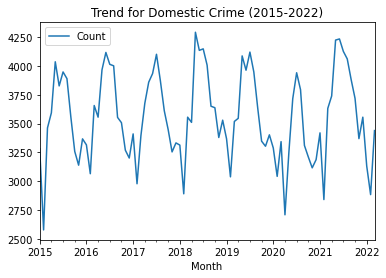

In [144]:
crime_d.plot()
plt.title('Trend for Domestic Crime (2015-2022)');

In [129]:
crime_nd=pd.DataFrame(list(count_nondomestic.items()),
                   columns=['Month', 'Count'])
crime_nd.index = pd.to_datetime(crime_nd['Month'])
crime_nd.drop(columns='Month',inplace=True)
crime_nd.head()

,Count
Month,
2015-01-01,17664
2015-02-01,13821
2015-03-01,18220
2015-04-01,18134
2015-05-01,19673


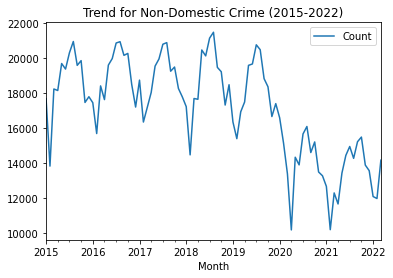

In [143]:
crime_nd.plot()
plt.title('Trend for Non-Domestic Crime (2015-2022)');

In [134]:
crime_person=pd.DataFrame(list(count_persons.items()),
                   columns=['Month', 'Count'])
crime_person.index = pd.to_datetime(crime_person['Month'])
crime_person.drop(columns='Month',inplace=True)
crime_person.head()

,Count
Month,
2015-01-01,7135
2015-02-01,5825
2015-03-01,7889
2015-04-01,7799
2015-05-01,9088


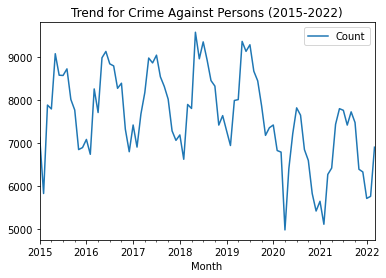

In [145]:
crime_person.plot()
plt.title('Trend for Crime Against Persons (2015-2022)');

In [136]:
crime_property=pd.DataFrame(list(count_property.items()),
                   columns=['Month', 'Count'])
crime_property.index = pd.to_datetime(crime_property['Month'])
crime_property.drop(columns='Month',inplace=True)
crime_property.head()

,Count
Month,
2015-01-01,9038
2015-02-01,6492
2015-03-01,8779
2015-04-01,9332
2015-05-01,10211


<AxesSubplot:xlabel='Month'>

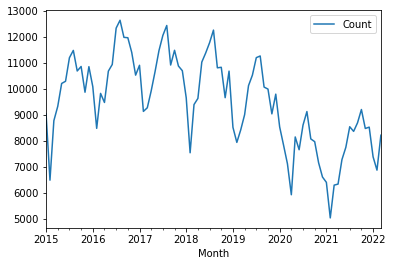

In [137]:
crime_property.plot()
plt.title('Trend for Crime Against Peoperty (2015-2022)');

In [138]:
crime_deceptive=pd.DataFrame(list(count_deceptive.items()),
                   columns=['Month', 'Count'])
crime_deceptive.index = pd.to_datetime(crime_deceptive['Month'])
crime_deceptive.drop(columns='Month',inplace=True)
crime_deceptive.head()

,Count
Month,
2015-01-01,1344
2015-02-01,1325
2015-03-01,1447
2015-04-01,1491
2015-05-01,1323


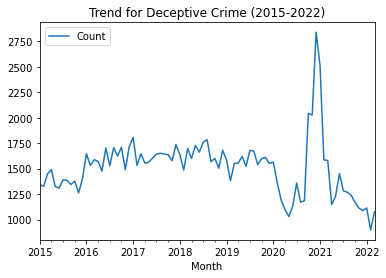

In [146]:
crime_deceptive.plot()
plt.title('Trend for Deceptive Crime (2015-2022)');

From the above plot, there is a seasonality in the pattern of crime.   
So we firstly try to decompose the seasonal factor to extract the trend.

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

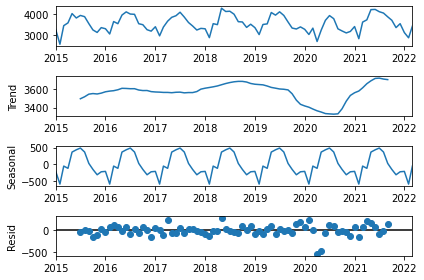

In [155]:
decompose_dome = seasonal_decompose(crime_d, model="additive")
decompose_dome.plot();

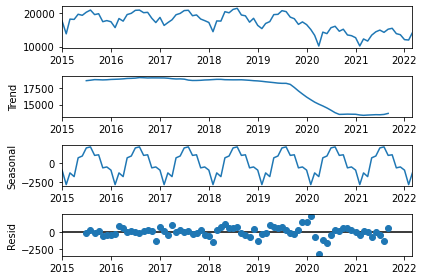

In [156]:
decompose_nondomestic = seasonal_decompose(crime_nd, model="additive")
decompose_nondomestic.plot();

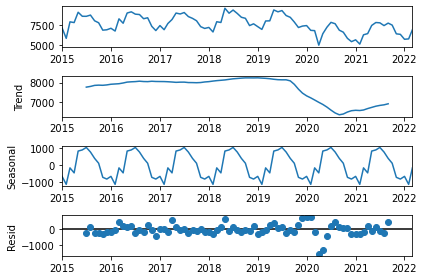

In [157]:
decompose_person = seasonal_decompose(crime_person, model="additive")
decompose_person.plot();

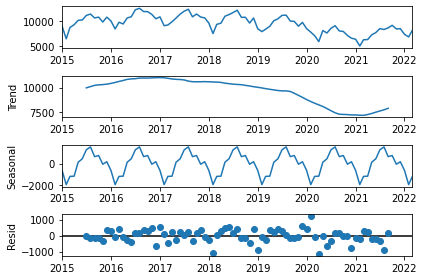

In [158]:
decompose_property = seasonal_decompose(crime_property, model="additive")
decompose_property.plot();

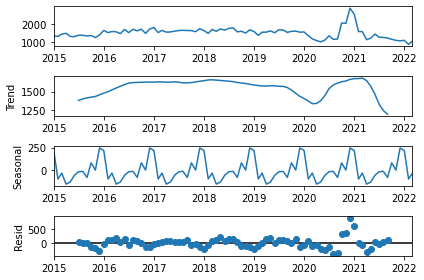

In [159]:
decompose_deceptive = seasonal_decompose(crime_deceptive, model="additive")
decompose_deceptive.plot();

In [ ]:
# mod = sm.tsa.statespace.SARIMAX(,
#                                 order=(0, 0, 1),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
# results = mod.fit()
# print(results.summary().tables[1])

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


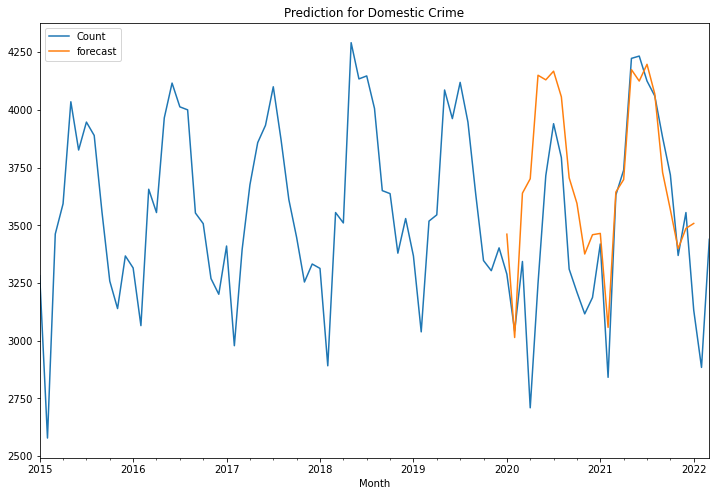

In [167]:
model=sm.tsa.statespace.SARIMAX(crime_d['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
crime_d['forecast']=results.predict(start="2020-01-01",end="2022-01-01",dynamic=True)
crime_d[['Count','forecast']].plot(figsize=(12,8))
plt.title('Prediction for Domestic Crime');

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


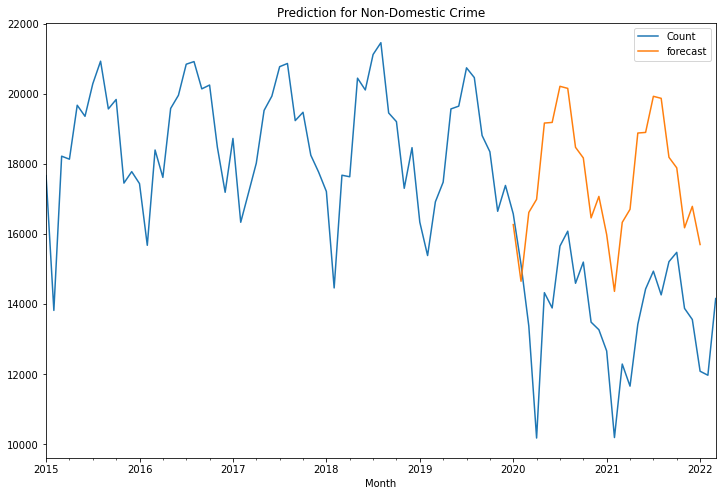

In [168]:
model=sm.tsa.statespace.SARIMAX(crime_nd['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
crime_nd['forecast']=results.predict(start="2020-01-01",end="2022-01-01",dynamic=True)
crime_nd[['Count','forecast']].plot(figsize=(12,8))
plt.title('Prediction for Non-Domestic Crime');

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


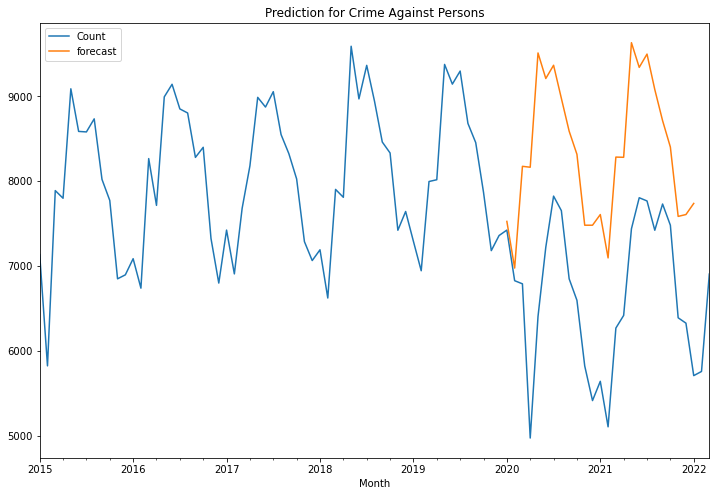

In [169]:
model=sm.tsa.statespace.SARIMAX(crime_person['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
crime_person['forecast']=results.predict(start="2020-01-01",end="2022-01-01",dynamic=True)
crime_person[['Count','forecast']].plot(figsize=(12,8))
plt.title('Prediction for Crime Against Persons');

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


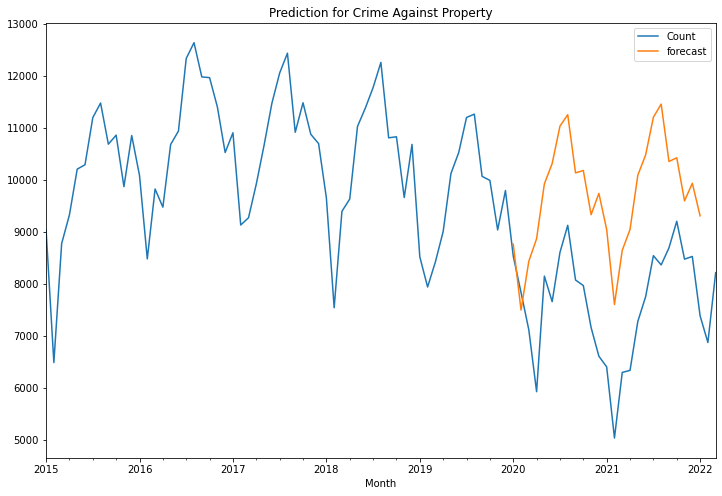

In [170]:
model=sm.tsa.statespace.SARIMAX(crime_property['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
crime_property['forecast']=results.predict(start="2020-01-01",end="2022-01-01",dynamic=True)
crime_property[['Count','forecast']].plot(figsize=(12,8))
plt.title('Prediction for Crime Against Property');

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


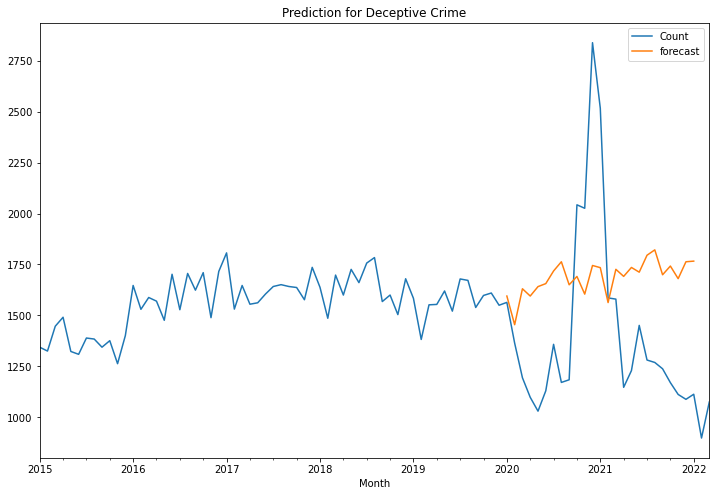

In [171]:
model=sm.tsa.statespace.SARIMAX(crime_deceptive['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
crime_deceptive['forecast']=results.predict(start="2020-01-01",end="2022-01-01",dynamic=True)
crime_deceptive[['Count','forecast']].plot(figsize=(12,8))
plt.title('Prediction for Deceptive Crime');